# Summary:
As previously explained, there are two parts to how a movement between point A and point B might vary. The second part is the speed of the movement. Here, I calculate the average speed, `s`, of each __Hit__ trial's movement, defined as $\frac{100}{\text{time}}$ in units of % movement/s. I then find the mean of these average speeds, `mean_s`, and variance of these average speeds, `var_s`, across all trials for the day.

### imports

In [51]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import scipy.signal as signal
import scipy.interpolate as interpolate
import pickle
import glob # find files in a directory
import re # regex for string parsing

### set `folder_name`

In [52]:
name = "ANA2"

In [53]:
folder_name = '../Data_Copy/AnalysisData/'+name+'/'
output_folder = "../Data_Copy/AnalysisData/"+name+"/analysis4_"+name+"/"
!mkdir {output_folder}

mkdir: ../Data_Copy/AnalysisData/ANA2/analysis4_ANA2/: File exists


### sort through relevant .mat files found in folder by day ("_d#")

In [54]:
unsorted_analysis2_folders = glob.glob(folder_name+'analysis2_'+name+'_*/')
sorted_analysis2_folders = sorted(unsorted_analysis2_folders, key=lambda x: int(re.search(r'd(.*?)(?:_|$)',x).group()[1]))

### Get `var_s` and `mean_s`
- For each day, go to corresponding analysis2 folder
    - Find `mean_s` and `var_s` for that day:
        - For each movement from that day, get the total time it took to do the entire movement
        - Calculate an overall average speed defined as $\frac{100}{\text{time}}$ in units of % movement/s
    - Then, find the variance and mean of these average speeds, `var_s` and `mean_s`, respectively, for all movements from a day
    - Append to `vars_vs` and `mean_ss`

In [55]:
var_ss = []
mean_ss = []
# loop through all analysis2 folders for each day
for analysis2_folder in sorted_analysis2_folders:

    vs = []
    # loop through all movements from that day
    for movement_file in glob.glob(analysis2_folder+'movement_trial*.npy'):
        movement_data = np.load(movement_file)
        time = (movement_data[0, -1] - movement_data[0, 0])
        print("time for total movement: ", time, "s")
        vs.append(100 / time)

    print("minimum velocity in %/s: ", np.min(vs))
    print("maximum velocity in %/s: ", np.max(vs))
    var_ss.append(np.var(vs))
    mean_ss.append(np.mean(vs))
    
var_ss = np.array(var_ss)
mean_ss = np.array(mean_ss)

time for total movement:  0.15130015355878612 s
time for total movement:  2.3560919704291337 s
time for total movement:  0.018020712069024114 s
time for total movement:  0.18666899574694185 s
time for total movement:  0.24650147311555415 s
time for total movement:  0.17560743807304924 s
time for total movement:  0.018019752820350732 s
time for total movement:  0.025839738809281698 s
time for total movement:  0.016490183326368424 s
time for total movement:  0.02465030797793588 s
time for total movement:  0.018870919983442036 s
time for total movement:  0.0753141038285321 s
time for total movement:  0.03145051777903518 s
time for total movement:  0.03451100883489744 s
time for total movement:  0.31008982086211745 s
time for total movement:  0.014790441177296998 s
time for total movement:  0.02006037753255896 s
time for total movement:  0.3680520412125361 s
time for total movement:  0.15929336569990937 s
time for total movement:  0.038591290273075174 s
time for total movement:  0.01921050

### Plot `var_ss` and `mean_ss` across days

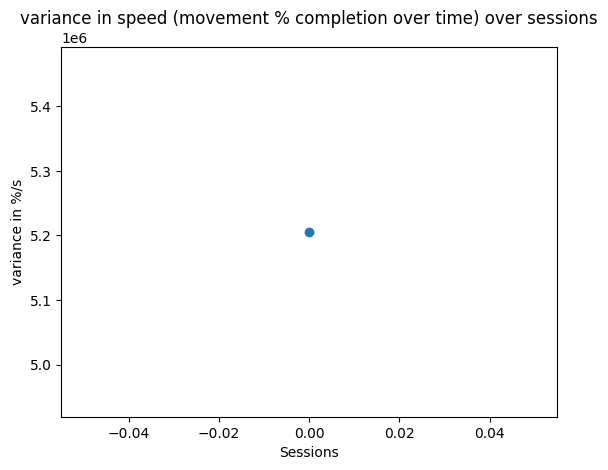

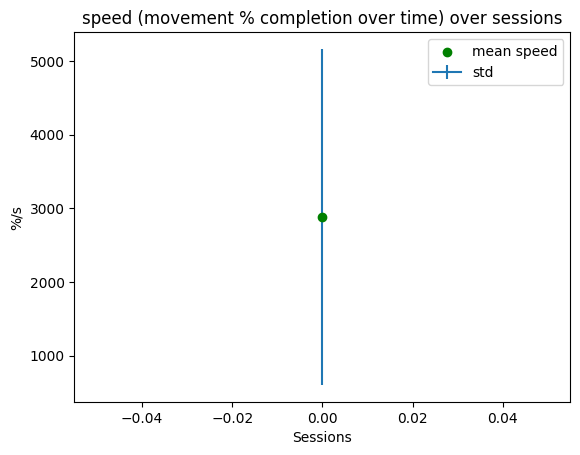

In [56]:
plt.scatter(range(0, len(var_ss)), var_ss)
plt.title('variance in speed (movement % completion over time) over sessions')
plt.ylabel("variance in %/s")
plt.xlabel("Sessions")
plt.show()

plt.errorbar(range(0, len(mean_ss)), mean_ss, yerr=np.sqrt(var_ss), label="std", zorder=1)
plt.scatter(range(0, len(mean_ss)), mean_ss, label="mean speed", color='green', zorder=3)
plt.title('speed (movement % completion over time) over sessions')
plt.ylabel('%/s')
plt.xlabel("Sessions")
plt.legend()
plt.show()

Save `var_ss` and `mean_ss`

In [57]:
np.save(output_folder+"var_ss", var_ss)
np.save(output_folder+"mean_ss", mean_ss)